<a href="https://colab.research.google.com/github/Thuoq/Mastering-Computer-Vision-with-TensorFlow-2.x/blob/main/Visual_Search_Using_Transfer_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding deep learning models using Tensorflow 


## Download weights 

In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

## Decoding predictions 

Dữ liệu ImageNet có 1.000 lớp khác nhau. Một mạng nơ-ron như Inception được đào tạo trên ImageNet sẽ xuất ra lớp dưới dạng số nguyên. Chúng ta cần chuyển đổi số nguyên thành một tên lớp tương ứng bằng cách sử dụng giải mã. Ví dụ, nếu đầu ra giá trị số nguyên là 311, chúng ta cần giải mã 311 có nghĩa là gì. Với giải mã, chúng ta sẽ biết rằng 311 tương ứng với một chiếc ghế gấp

In [10]:
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.resnet50 import decode_predictions
from tensorflow.keras.applications.inception_v3 import decode_predictions


In [11]:
decode_predictions

<function keras.applications.inception_v3.decode_predictions>

## Import orthe comom features


In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
import os 

Code ở trên chúng ta đã làm nhũng điều sau 
1. chúng ta load Keras image preprocessing 
2. `numpy` là 1 Python array processing function
3. `matplotlib` là 1 Python plotting fnc
4. `os` module yêu cầu truy cập vào thư mục của file input

## Constructing a model 

```
model = Modelx(weights = 'imagenet',
               include_top = True,
               input_shape=(img_height,img_width,3))
Voi Modelx = VGG16 or ResNet50 or InceptionV3
```

1. `weights` là pre-trained model mà chúng ta sử dụng trên hình ảnh ImageNet chúng ta đã download từ trước
2. `include_top` func tion chỉ định liệu final dense layerr có nên include hay ko. Nếu class prediction cho 1 pre-traied model, nó luôn luôn là True, nếu `transfer-learning` nó luôn luôn là False chỉ để các layer tích chập 
3. `input_shape` chúng ta height width và chanel đặt là 3. 

In [ ]:
### Inputting images from a directory 
folder_path = '/home/…/visual_search/imagecnn/'
images = os.listdir(folder_path)
fig = plt.figure(figsize=(8,8))

FileNotFoundError: ignored

In [ ]:
!unzip "/content/drive/MyDrive/archive.zip"

Streaming output truncated to the last 5000 lines.
  inflating: furniture-images/img/train/table/00000295.jpg  
  inflating: furniture-images/img/train/table/00000296.jpg  
  inflating: furniture-images/img/train/table/00000297.jpg  
  inflating: furniture-images/img/train/table/00000298.jpg  
  inflating: furniture-images/img/train/table/00000299.jpg  
  inflating: furniture-images/img/train/table/00000300.jpg  
  inflating: furniture-images/img/train/table/00000301.jpg  
  inflating: furniture-images/img/train/table/00000302.jpg  
  inflating: furniture-images/img/train/table/00000303.jpg  
  inflating: furniture-images/img/train/table/00000304.jpg  
  inflating: furniture-images/img/train/table/00000305.jpg  
  inflating: furniture-images/img/train/table/00000306.jpg  
  inflating: furniture-images/img/train/table/00000307.jpg  
  inflating: furniture-images/img/train/table/00000308.jpg  
  inflating: furniture-images/img/train/table/00000309.jpg  
  inflating: furniture-images/img/

# Developing a transfer learning 

## Importing Tensorflow Libraries 

In [13]:
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import SGD,Adam
img_width,img_height = 224,224

## Setting up model parameters 

In [14]:
NUM_EPOCHS = 5
batchsize =10
num_train_images = 900
num_val_images = 100
base_model = ResNet50(weights='imagenet'
                      ,include_top=False
                      ,input_shape=(img_height,img_width,3)
                      )

## Building an input data pipeline 
Chúng ta đã import dữ liệu hình ảnh generator rằng tạo ra 1 tensor images sử dung data augmentation như là xoay,

### Training data generator 

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dr = "/content/furniture-images/img/train"
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
    ,rotation_range=90
    ,horizontal_flip = True
    ,vertical_flip = True)

Flow cho API thư mục — điều này được sử dụng để nhập dữ liệu từ các thư mục. Nó có các thông số sau:

1. **Directory**: Đây là 1 folder path và nó nên đặt là cái đường ở hình ảnh có tất cả các class ở trên
2. **target_size**: đặt nó bằng size của hình ảnh model muốn lấy, ví dụ 299x299 cho Inception và 224x244 cho ResNet và VGG16
3. **Color_mode**: Đặt là `grayscale` image and `RGB` cho color image
4. **class_mode**: Đặt bằng binary khi chỉ có 2 class để dự đoán và set to `categorical` khi có nhiều hơn 2


In [16]:
train_generator = train_datagen.flow_from_directory(
    train_dr,
    target_size = (img_height,img_width),
    batch_size = batchsize
)

Found 4024 images belonging to 5 classes.


### Validation data generator 


Tiếp, chúng ta sẽ lặp lại quá trình trên cho validation.

In [17]:
from keras.preprocessing.image import ImageDataGenerator


In [21]:
val_dir = '/content/furniture-images/img/val'
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True
)
val_generator = val_datagen.flow_from_directory(val_dir,
                                              target_size=(img_height,img_width)
                                              ,batch_size=batchsize)


Found 423 images belonging to 5 classes.


### Constructing the final model using transfer learning 

Chúng ta bắt đầu định nghĩa 1 hàm được gọi là `build_final_model()`, nó sẽ lấy base model và model parameters như là dropout, fully connection. Đầu tiên chúng freezee base model sử dụng `layer.trainable = False`

In [27]:
def build_final_model(base_model,dropout,fc_layers,num_classes):
  for layer in base_model.layers:
    layer.trainble = False
    x = base_model.output
    x = Flatten()(x)
  for fc in fc_layers:
    # New FC layer, random init
    x = Dense(fc,activation='relu')(x)
    x = Dropout(dropout)(x)
  # New softmax layers
  predictions = Dense(num_classes,activation='softmax')(x)
  final_model = Model(inputs=base_model.input,outputs = predictions)
  return final_model

In [28]:
class_list = ["bed","chair","sofa","swivelchair","table"]
FC_LAYERS = [1024,1024]
dropout= 0.3
final_model = build_final_model(base_model
                                ,dropout=dropout
                                ,fc_layers=FC_LAYERS
                                ,num_classes=len(class_list))

In [30]:
adam = Adam(learning_rate =0.0001)
final_model.compile(adam
                    ,loss='categorical_crossentropy'
                    ,metrics=['accuracy'])

In [ ]:
history= final_model.fit(train_generator,epochs=NUM_EPOCHS,steps_per_epoch=num_train_images,
                         validation_data=val_generator,
                         validation_steps = num_val_images)

Epoch 1/5
399/900 [============>.................] - ETA: 1:11:10 - loss: 1.1189 - accuracy: 0.7686

Có rất nhiều parameters của `model.fit()` chúng ta sẽ giải thích ở dưới đây:
1. `train_dir` Input training data
2. `steps_per_epochs`

### Saving a model with checkpoints 

## Undestanding the arrchitecture and applications of visual search 

### The architecture of visual search 

models deep neural network model như là ResNet, VGG16 và Inception có thể dễ dàng chia ra thành 2 phần nhỏ:
1. Thành phần đầu tiên là xác định nội dung cấp thấp của hình ảnh, như là các feature 
2. Thành phần thứ 2 là đại diện cho nội dung của bậc cao của ảnh như là cái giá trị cuối cùng của ảnh được tổng hợp từ tập các feature từ bước 1. 


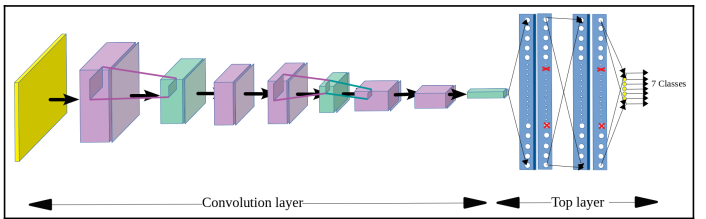

Sơ đồ trên cho thấy toàn bộ mô hình mạng nơ ron phân loại hình ảnh có thể được chia thành hai: lớp chập và lớp trên cùng. Cái lớp cuối cùng trong lớp chậy trước khi FC là 1 feature vector của save (X,Y,# of chanel). cái đó sẽ duỗi thẳng thành (#of images , X*Y*# )

Trong visual search, chúng ta tính 2 hình ảnh được giống nhau bới so sánh các feature vector sử dụng những công cụ như là Eucidean distance haowcj corsine simillarity. 



> Indented block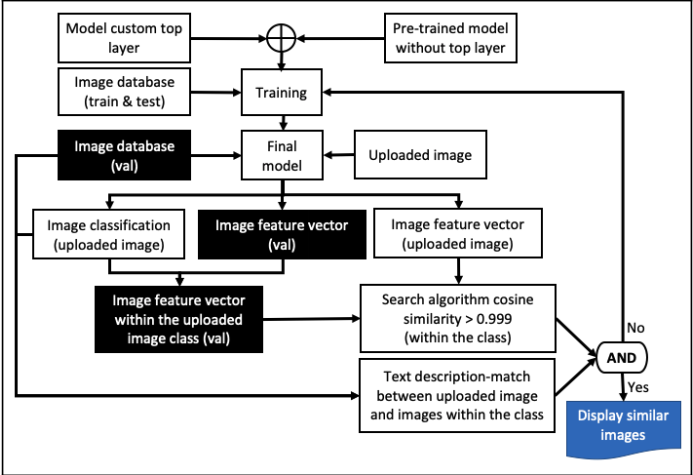



1. Sử dụng transer learning để phát triển 1 model mới tách ra bởi top layer.
2. Train new model trong dataset của mình
3. Upload 1 hình ảnh và tìm ra những cái feature vector và hình anh bởi cái model chúng ta vừa developed 
4. Để giảm thời gian searching, chúng ta chỉ search trong 1 directory class mà image class up lên 
5. Search sử dụng thuật toán như là Eucidean distance hoặc coisne simirt 
6. Display kết quả nếu similart > 0.9999


### Visual search code và giải thích
1. Đầu tiên chúng ta chỉ định 1 folder cho cái ảnh mà chúng ta uploaded
```
#img_path = '../bed1.jpg'
```
2. chúng ta sẽ uplaod image convert to an array 
```
img = image.load_img(img_path, target_size =(224,224)
img_data= image.img_to_array(img)
img_data = np.expand_dims(img_data,axis=)
img_data = preprerocess_input(img_data)
```